In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [3]:
import requests
import grequests

import pandas as pd

import time

In [34]:
countries = ["pl", "de", "usa", "fra"]

params = ["format=json", "date=1960:2022", "per_page=100"]

indicator = "FP.CPI.TOTL.ZG"

In [35]:
# # synchronous
# responses = []
# start = time.time()

# for country in countries:
#     url = f'http://api.worldbank.org/v2/country/{country}/indicator/{indicator}'
#     request = url + '?' + ''.join([f'{param}&' for param in params])[:-1]

#     responses.append(requests.get(request).json())

# end = time.time()
# print(f'{(end - start):0.2f} s')

# len(responses), responses[0][1][:2]

In [36]:
# asynchronous
start = time.time()

async_list = []
for country in countries:
    url = f"http://api.worldbank.org/v2/country/{country}/indicator/{indicator}"
    request = url + "?" + "".join([f"{param}&" for param in params])[:-1]
    async_list.append(grequests.get(request))

responses = [response.json() for response in grequests.map(async_list)]

end = time.time()
print(f"{(end - start):0.2f} s")

len(responses), responses[0][1][:2]

0.73 s


(4,
 [{'indicator': {'id': 'FP.CPI.TOTL.ZG',
    'value': 'Inflation, consumer prices (annual %)'},
   'country': {'id': 'PL', 'value': 'Poland'},
   'countryiso3code': 'POL',
   'date': '2020',
   'value': 3.3744697261859,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'FP.CPI.TOTL.ZG',
    'value': 'Inflation, consumer prices (annual %)'},
   'country': {'id': 'PL', 'value': 'Poland'},
   'countryiso3code': 'POL',
   'date': '2019',
   'value': 2.227478809383,
   'unit': '',
   'obs_status': '',
   'decimal': 1}])

In [37]:
data_years = [entry["date"] for entry in responses[0][1]]
data_years[:10]

['2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011']

In [38]:
data_countries = [response[1][0]["country"]["value"] for response in responses]
data_countries

['Poland', 'Germany', 'United States', 'France']

In [39]:
data_values = [[entry["value"] for entry in response[1]] for response in responses]
data_values[0][:3]

[3.3744697261859, 2.227478809383, 1.81295156542681]

In [40]:
list(zip(*([data_years] + data_values)))[:3]

[('2020',
  3.3744697261859,
  0.506689889953274,
  1.23358439630637,
  0.476498852725083),
 ('2019', 2.227478809383, 1.4456670146976, 1.81221007526015, 1.10825492288292),
 ('2018',
  1.81295156542681,
  1.73216766075662,
  2.44258329692818,
  1.85081508315494)]

In [43]:
data_df = pd.DataFrame(
    list(zip(*data_values)), columns=data_countries, index=data_years
).iloc[::-1]
data_df.head(70)

,Poland,Germany,United States,France
1960,NaN,1.536612,1.457976,4.139936
1961,NaN,2.293676,1.070724,2.400461
1962,NaN,2.843280,1.198773,5.331280
1963,NaN,2.966961,1.239669,4.999153
1964,NaN,2.335728,1.278912,3.211192
...,...,...,...,...
2016,-0.664767,0.491749,1.261583,0.183335
2017,2.075936,1.509497,2.130110,1.032283
2018,1.812952,1.732168,2.442583,1.850815
2019,2.227479,1.445667,1.812210,1.108255


C:\Users\MatiX\anaconda3\envs\py39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


<AxesSubplot:>

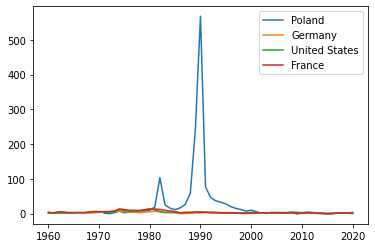

C:\Users\MatiX\anaconda3\envs\py39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [42]:
data_df.plot(use_index=True, kind="line")

In [11]:
if "data" not in os.listdir():
    os.mkdir("data")

data_df.to_csv("data/example_df.csv")

In [1]:
import wbgapi as wb

if __name__ == "__main__":
    help(wb.series)
    print(wb.series.get("FP.CPI.TOTL.ZG"))
    df = wb.data.DataFrame(
        ["SP.POP.TOTL", "EN.ATM.CO2E.KT"],
        time=range(2000, 2020),
        skipBlanks=True,
        columns="series",
    )

Help on module wbgapi.series in wbgapi:

NAME
    wbgapi.series - Access information about series in a database

FUNCTIONS
    Series(id='all', q=None, topic=None, db=None, name='SeriesName')
        Return a pandas Series by calling list
    
    get(id, db=None)
        Retrieve a specific series object
        
        Arguments:
            id:     the series identifier
        
            db:     database; pass None to access the global database
        
        Returns:
            a series object
        
        Example:
            print(wbgapi.series.get('SP.POP.TOTL')['value'])
    
    info(id='all', q=None, topic=None, db=None)
        Print a user report of series. This can be time consuming
        for large databases like the WDI if 'all' series are requested.
        
        Arguments:
            id:         a series identifier or list-like of identifiers
        
            q:          search string (on series name))
        
            topic:      topic ID or li

/home/maciektr/Programowanie/AGH_Laby/worldbank_data_exploration/venv/lib/python3.8/site-packages/wbgapi/data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


                EN.ATM.CO2E.KT  SP.POP.TOTL
economy time                               
ABW     YR2000             NaN      90866.0
        YR2001             NaN      92892.0
        YR2002             NaN      94992.0
        YR2003             NaN      97016.0
        YR2004             NaN      98744.0
...                        ...          ...
ZWE     YR2015         12400.0   13814642.0
        YR2016         10990.0   14030338.0
        YR2017         10230.0   14236599.0
        YR2018         12270.0   14438812.0
        YR2019             NaN   14645473.0

[5299 rows x 2 columns]


In [2]:
df

NameError: name 'df' is not defined